In [1]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.46579213e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71096554e-04, 0.00000000e+00, 4.49506713e-03, 0.00000000e+00,
       5.66382447e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67657184e-01,
       0.00000000e+00, 0.00000000e+00, 4.19932806e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.00360227e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.24139884e-01, 0.00000000e+00, 0.00000000e+00,
       2.90019042e-02, 0.00000000e+00, 2.62874018e-04, 0.00000000e+00,
       0.00000000e+00, 6.64067446e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.15709263e-02, 0.00000000e+00,
       9.40422168e-01, 8.51308850e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.44103733e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.49173503e-03, 2.98725466e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04331364e-04,
       1.08783334e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.88229020e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.58055635e-01, 9.84544289e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62851585e-02, 0.00000000e+00,
       0.00000000e+00, 9.85098601e-01, 0.00000000e+00, 4.45557056e-02,
       0.00000000e+00, 0.00000000e+00, 4.26488885e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96688515e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.71458844e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.86381708e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14744527e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.05927209e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97249218e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.25549919e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.92255096e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.19802923e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08369366e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.86939062e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.50028104e-06, 3.28252901e-01, 1.39045401e-02,
       6.23529412e-01, 5.92156863e-01, 2.35294118e-01, 1.41176471e-01,
       0.00000000e+00, 4.68033609e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53179120e-04, 0.00000000e+00,
       1.65885553e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.70588235e-01, 9.95564037e-01,
       9.52386323e-01, 9.96065416e-01, 9.96078431e-01, 9.45098039e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 8.04697011e-01,
       6.66666667e-01, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.40495159e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.35117956e-03,
       0.00000000e+00, 0.00000000e+00, 3.20159117e-01, 4.47058824e-01,
       2.82352941e-01, 4.47058824e-01, 6.39215686e-01, 8.90196078e-01,
       9.96078431e-01, 8.82352941e-01, 9.96078431e-01, 4.95993609e-01,
       2.36729978e-01, 9.80392157e-01, 8.98039216e-01, 9.96078431e-01,
       9.96078431e-01, 6.69668329e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.06244336e-02, 0.00000000e+00, 1.45779230e-02,
       0.00000000e+00, 0.00000000e+00, 5.19269059e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.10260095e-03, 0.00000000e+00,
       1.68761037e-03, 0.00000000e+00, 0.00000000e+00, 6.66666667e-02,
       2.58823529e-01, 5.49019608e-02, 2.62745098e-01, 2.62745098e-01,
       2.62745098e-01, 2.31372549e-01, 8.37523110e-02, 2.86881110e-03,
       9.96078431e-01, 4.15686275e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.13758110e-03, 2.40590646e-03, 3.69659366e-02,
       0.00000000e+00, 1.54374353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92064483e-03,
       5.96781149e-04, 0.00000000e+00, 3.25490196e-01, 9.92156863e-01,
       8.19607843e-01, 7.05882353e-02, 5.12408144e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.17299034e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02836915e-06,
       8.08306814e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.62745098e-02, 9.13725490e-01, 1.00000000e+00,
       3.25490196e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96154632e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.78094269e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.43975089e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69266385e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.94250275e-01, 0.00000000e+00, 1.07537992e-03,
       0.00000000e+00, 5.05882353e-01, 9.96078431e-01, 9.33333333e-01,
       1.72549828e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.64496634e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.81051947e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.05541600e-01, 9.82298935e-01,
       3.98626673e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.21779657e-01, 9.76470588e-01, 9.98883734e-01, 2.43137255e-01,
       0.00000000e+00, 0.00000000e+00, 1.09179652e-02, 6.33466836e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.24737161e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.98278793e-01, 0.00000000e+00, 0.00000000e+00,
       5.21568627e-01, 6.09461271e-03, 4.19955480e-03, 1.96078431e-02,
       3.36306618e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.05547119e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.04649617e-02, 0.00000000e+00, 4.19498481e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.10116266e-02, 9.95659696e-01, 0.00000000e+00, 3.60284134e-02,
       8.03921569e-01, 9.72549020e-01, 1.07350200e-02, 0.00000000e+00,
       2.12906050e-01, 2.48219209e-04, 0.00000000e+00, 6.09120279e-01,
       1.34819748e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.94378406e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.53654385e-03, 3.80979526e-04,
       9.79728150e-01, 0.00000000e+00, 0.00000000e+00, 1.29077499e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.94117647e-01,
       9.96078431e-01, 7.20377065e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47464378e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.56049796e-01,
       0.00000000e+00, 1.84250922e-02, 0.00000000e+00, 0.00000000e+00,
       9.95758532e-01, 6.42139012e-04, 4.01300952e-03, 0.00000000e+00,
       1.64381433e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94112118e-01, 9.84313725e-01,
       9.45828230e-01, 2.23529412e-01, 0.00000000e+00, 2.28754169e-02,
       0.00000000e+00, 2.75613726e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.65285053e-02, 0.00000000e+00, 3.21014386e-03, 2.56508898e-02,
       0.00000000e+00, 9.78258243e-01, 9.96893198e-01, 0.00000000e+00,
       0.00000000e+00, 2.15323556e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.45098039e-02, 8.52983864e-01, 9.96078431e-01,
       6.50980392e-01, 1.32317939e-02, 9.80209573e-01, 0.00000000e+00,
       0.00000000e+00, 9.96945841e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.36712987e-03, 0.00000000e+00, 0.00000000e+00,
       3.50174955e-05, 8.95568447e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.93599784e-01, 9.22745646e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39533733e-02, 0.00000000e+00,
       1.78396762e-01, 7.96078431e-01, 9.96078431e-01, 8.58823529e-01,
       9.60831749e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.89743956e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.70217973e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.51030013e-02,
       1.49019608e-01, 9.96078431e-01, 9.50819506e-01, 3.01960784e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.62988525e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47851828e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.65032916e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.49556890e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21568627e-01,
       8.78431373e-01, 9.96078431e-01, 4.42807352e-01, 3.92156863e-03,
       9.73081884e-01, 0.00000000e+00, 9.97396466e-01, 0.00000000e+00,
       0.00000000e+00, 9.89316241e-01, 1.87511268e-04, 0.00000000e+00,
       9.37135110e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.83782271e-01, 0.00000000e+00, 0.00000000e+00, 5.21568627e-01,
       9.96078431e-01, 9.96078431e-01, 2.02832893e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.19452374e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.72386163e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.86803795e-01, 9.49805941e-01,
       9.96078431e-01, 9.96078431e-01, 2.03921569e-01, 4.43274538e-04,
       0.00000000e+00, 0.00000000e+00, 3.68809756e-02, 0.00000000e+00,
       0.00000000e+00, 1.27992068e-05, 0.00000000e+00, 0.00000000e+00,
       6.13051115e-02, 0.00000000e+00, 0.00000000e+00, 6.43504814e-03,
       1.28059494e-04, 4.56522532e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.77662310e-01, 9.96078431e-01,
       9.96078431e-01, 8.59031484e-01, 1.56862745e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.47295026e-04, 6.35183922e-03,
       0.00000000e+00, 2.59613987e-02, 0.00000000e+00, 0.00000000e+00,
       4.58193182e-03, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       8.11764706e-01, 7.05882353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.69615248e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
#x_dif = x_best*255-x_test[0]
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.46579213e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.71096554e-04,  0.00000000e+00,  4.49506713e-03,  0.00000000e+00,
        5.66382447e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.67657184e-01,
        0.00000000e+00,  0.00000000e+00,  4.19932806e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00360227e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.24139884e-01,  0.00000000e+00,  0.00000000e+00,
        2.90019042e-02,  0.00000000e+00,  2.62874018e-04,  0.00000000e+00,
        0.00000000e+00,  6.64067446e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15709263e-02,  0.00000000e+00,
        9.40422168e-01,  8.51308850e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.46579213e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.71096554e-04  0.00000000e+00  4.49506713e-03  0.00000000e+00
  5.66382447e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.67657184e-01
  0.00000000e+00  0.00000000e+00  4.19932806e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00360227e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.24139884e-01  0.00000000e+00  0.00000000e+00
  2.90019042e-02  0.00000000e+00  2.62874018e-04  0.00000000e+00
  0.00000000e+00  6.64067446e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.15709263e-02  0.00000000e+00
  9.40422168e-01  8.51308850e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.44103733e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.49173

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

166


4


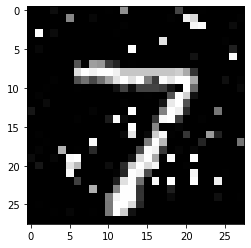

4


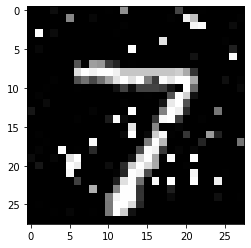

4


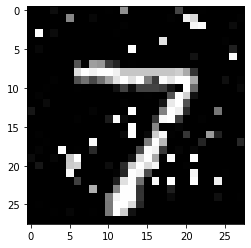

2


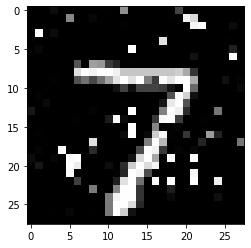

2


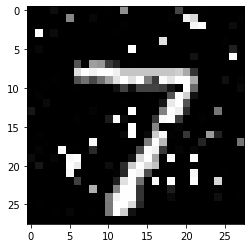

1


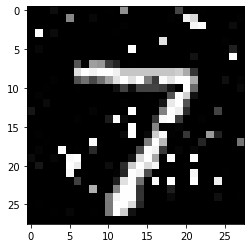

5


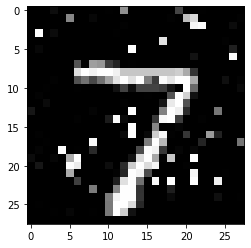

1


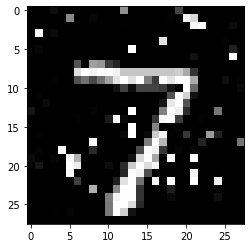

0


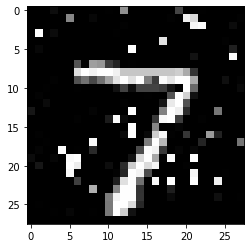

2


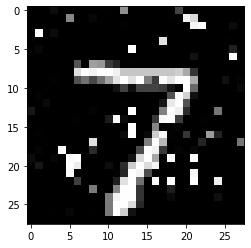

3


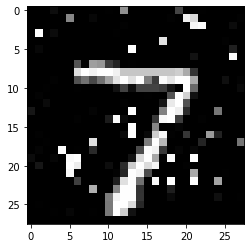

4


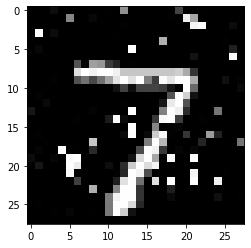

4


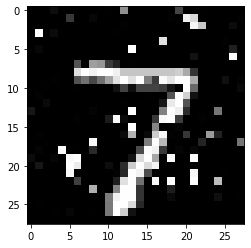

3


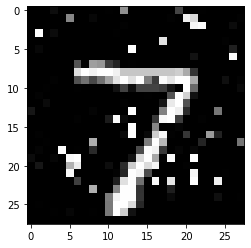

6


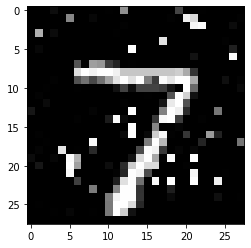

1


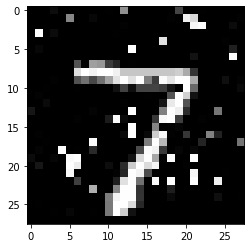

0


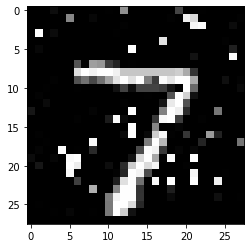

4


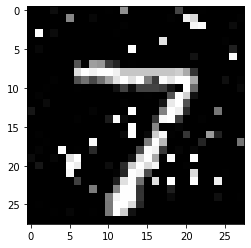

4


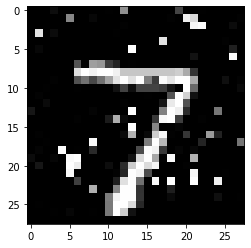

1


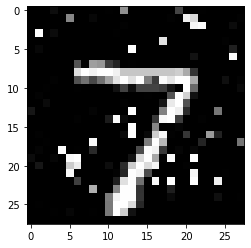

5


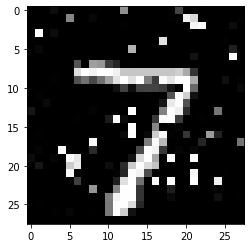

3


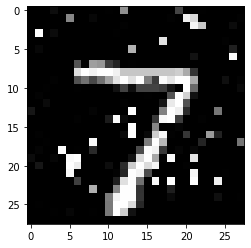

2


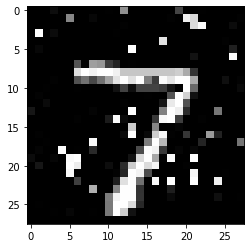

2


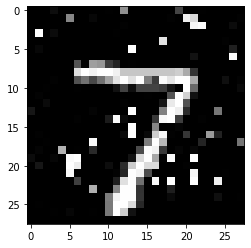

4


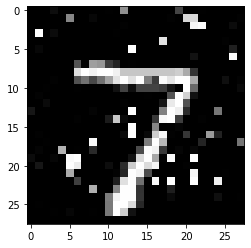

5


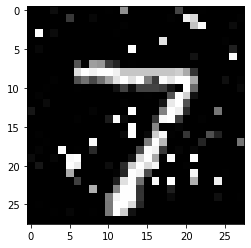

0


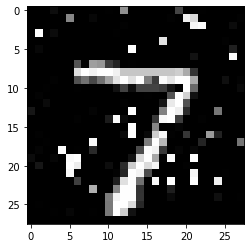

3


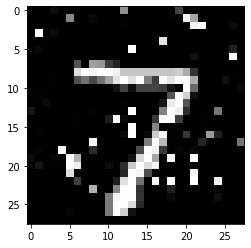

5


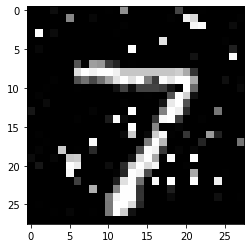

8


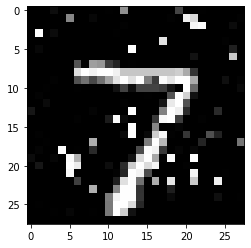

7


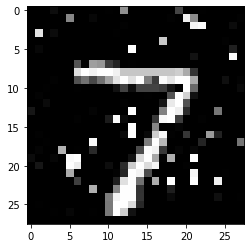

3


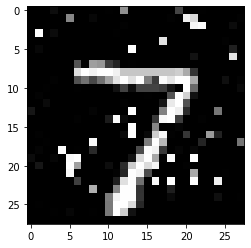

5


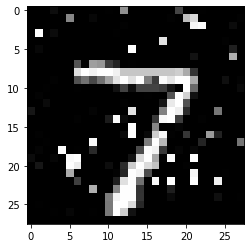

3


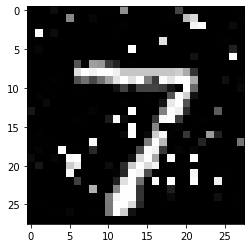

1


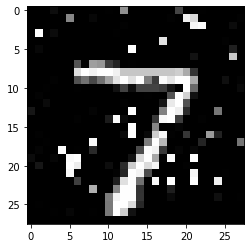

4


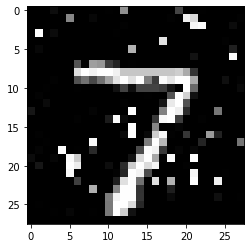

3


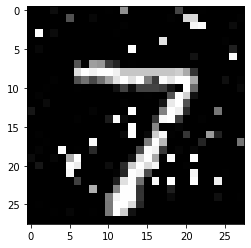

2


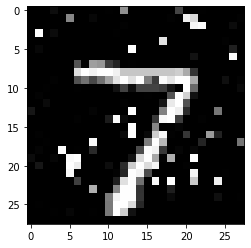

2


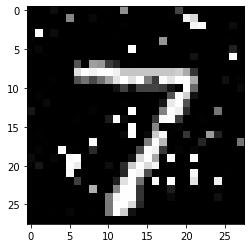

4


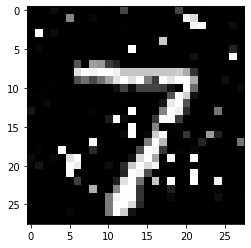

3


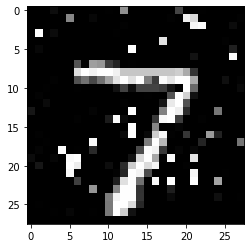

2


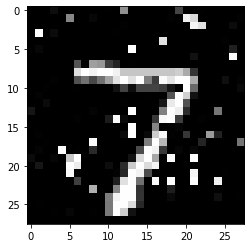

4


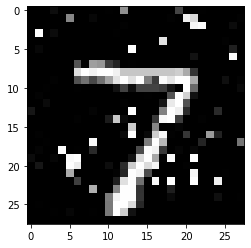

5


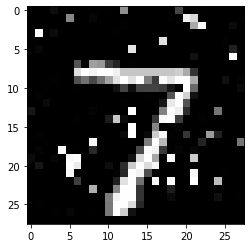

3


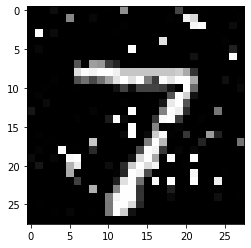

1


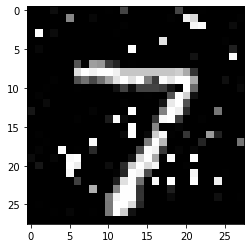

3


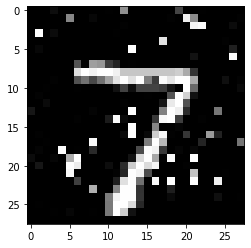

4


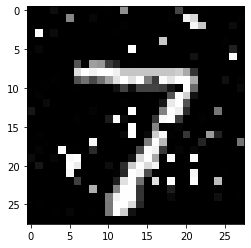

5


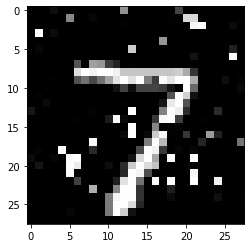

1


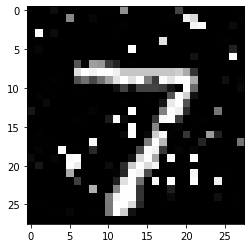

In [8]:
# 种群生成方法1
import copy
x_tmp = copy.deepcopy(x_dif)
x_des = []
for r in range(50):
    count = 0
    for k in range(784):
        if x_dif[k] > 0.3:
            x = random.randint(0,10000)/10000
            if x <= 0.1:
                x_tmp[k] -= random.randint(1,3)/10
                count += 1
    print(count)
    x_des.append(np.array(x_tmp.reshape(1,784)))
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

86


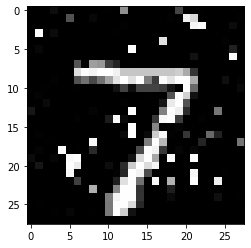

109


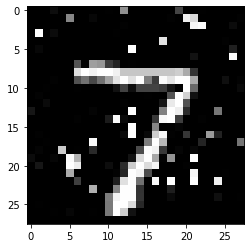

145


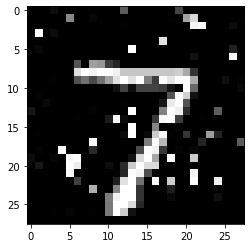

97


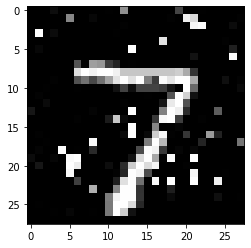

24


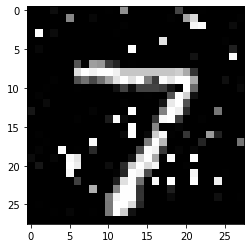

99


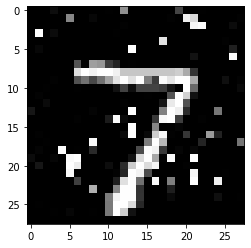

98


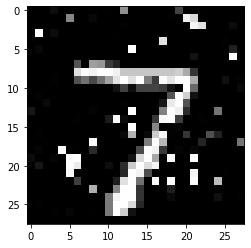

107


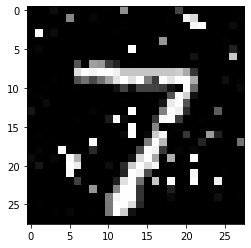

3


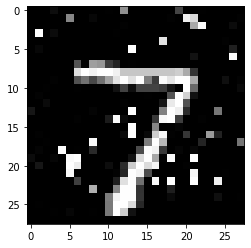

103


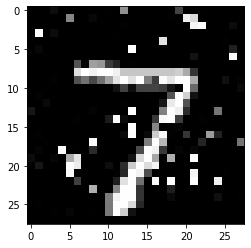

130


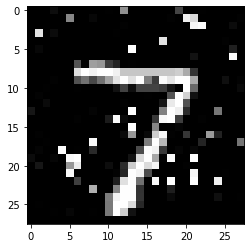

162


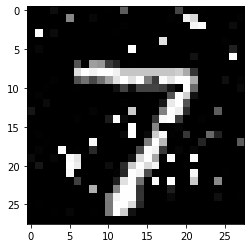

130


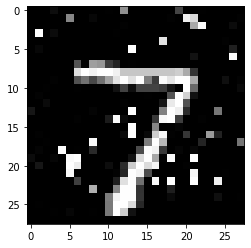

106


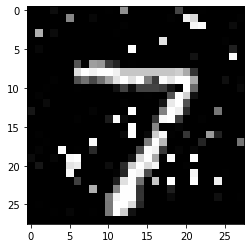

58


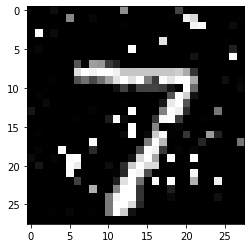

31


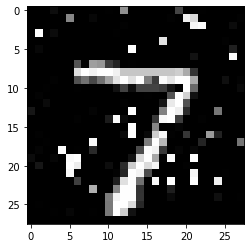

40


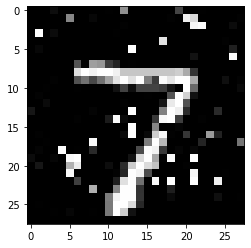

98


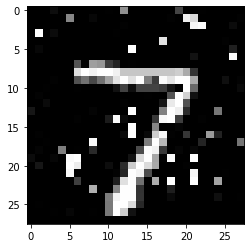

2


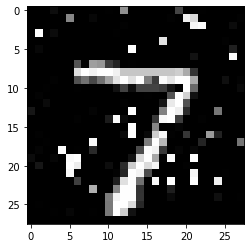

88


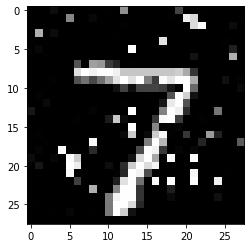

147


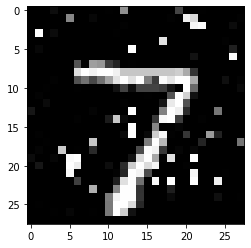

54


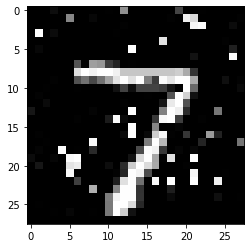

43


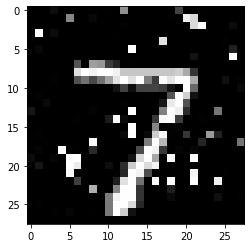

32


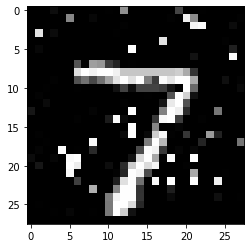

116


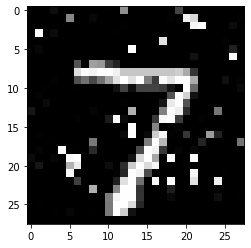

26


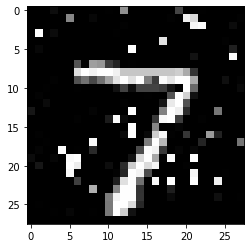

145


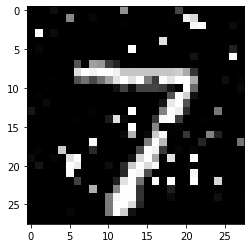

50


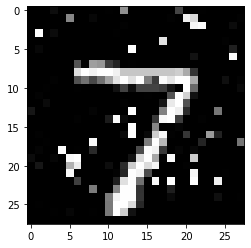

163


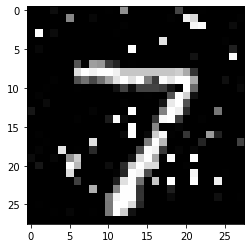

31


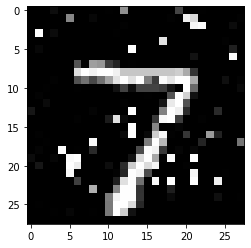

22


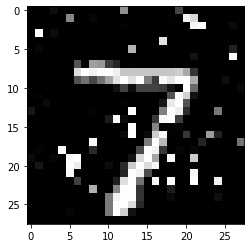

35


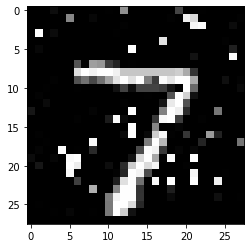

102


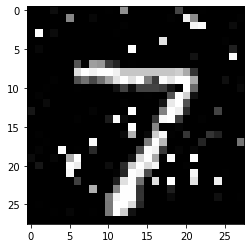

106


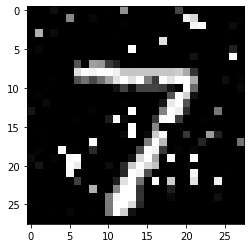

89


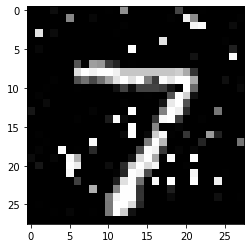

40


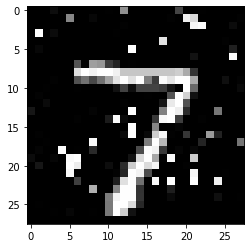

91


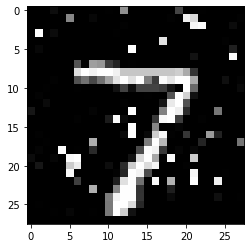

82


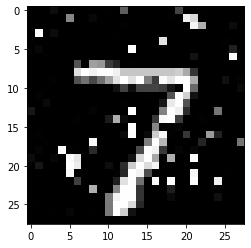

41


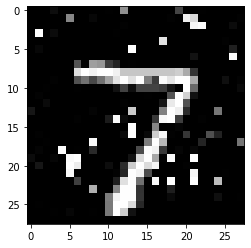

113


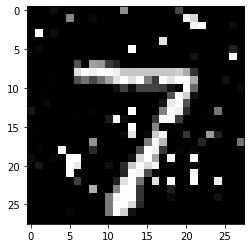

158


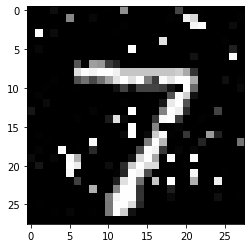

125


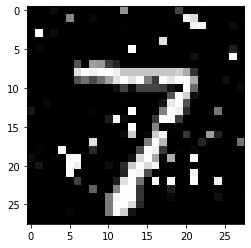

8


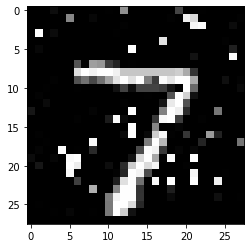

1


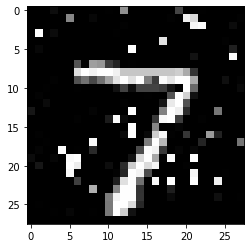

114


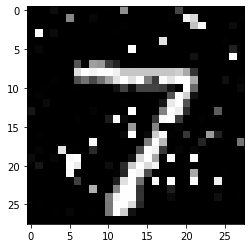

77


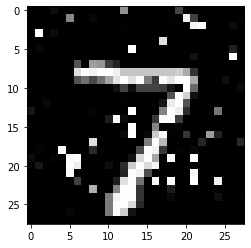

130


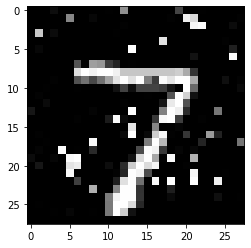

110


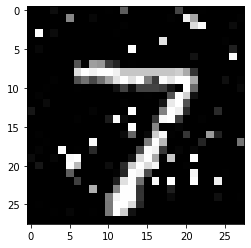

30


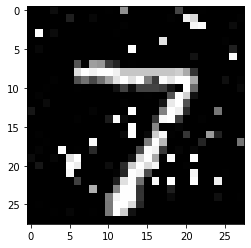

5


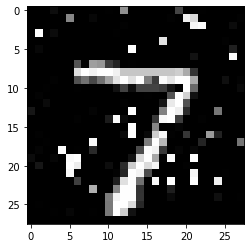

In [9]:
# 种群生成方法2
import copy
x_tmp = copy.deepcopy(x_dif)
x_des1 = []
for r in range(50):
    x = []
    L = random.randint(1,166)
    for i in range(L):
        x.append(random.randint(0,783))
        if x_tmp[x[i]] > 0.3:
            x_tmp[x[i]] -= random.randint(1,3)/10

    x_des1.append(np.array(x_tmp.reshape(1,784)))
    print(L)
    x_re = x_tmp+x_test[0]/255
    re = x_re.reshape(28,28)
    plt.imshow(re,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_dif)

In [10]:
model = load_model('mnist_model.h5')

In [11]:
def Func(x):     # 将攻击点与原图结合
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

In [12]:
def Dis(x):   # 扰动值
    res = 0
    for i in range(784):
        l = x[i]
        res += l**2
    return res

最优值： 0.18967076 扰动程度 28.689811518192602
最优值： 0.19342187 扰动程度 28.5035282009796
最优值： 0.19217558 扰动程度 28.159020517136003
最优值： 0.19196443 扰动程度 28.17050971396208
最优值： 0.19281015 扰动程度 28.118583435173125
最优值： 0.19634561 扰动程度 27.927788071711927
最优值： 0.19634561 扰动程度 27.927788071711927
最优值： 0.1944984 扰动程度 27.742700429524202
最优值： 0.20749958 扰动程度 27.367879806470324
最优值： 0.22193994 扰动程度 27.304185734955176
最优值： 0.21279162 扰动程度 26.896937544891795
最优值： 0.21596184 扰动程度 26.637923191354595
最优值： 0.21985303 扰动程度 26.45013437373152
最优值： 0.23316109 扰动程度 26.14486299913466
最优值： 0.24379237 扰动程度 26.094074760924297
最优值： 0.25008318 扰动程度 25.461916676202655
最优值： 0.25164533 扰动程度 25.32075602024853
最优值： 0.26510015 扰动程度 25.239868062463845
最优值： 0.26393327 扰动程度 25.07018315019008
最优值： 0.26407138 扰动程度 25.06654742768349
最优值： 0.25740016 扰动程度 24.637050353278543
最优值： 0.28529465 扰动程度 24.665303351460267
最优值： 0.28087282 扰动程度 24.443285095192962
最优值： 0.29298788 扰动程度 23.913925024029194
最优值： 0.29935363 扰动程度 23.825487539937935
最优值： 0.31

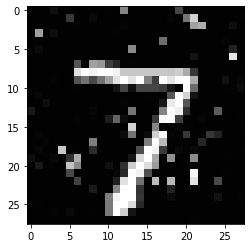

In [14]:
#1
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.18967076 扰动程度 28.689811518192602
最优值： 0.19118005 扰动程度 28.5572817098634
最优值： 0.19712177 扰动程度 28.132263501103598
最优值： 0.20534457 扰动程度 28.00617094230197
最优值： 0.20678277 扰动程度 27.95393212542557
最优值： 0.21654782 扰动程度 27.0673605339146
最优值： 0.21908596 扰动程度 27.094455233762407
最优值： 0.22416496 扰动程度 26.8244405605808
最优值： 0.22783801 扰动程度 26.576604710847107
最优值： 0.21972279 扰动程度 26.41942954865951
最优值： 0.23699215 扰动程度 26.038388432982313
最优值： 0.24266039 扰动程度 25.886292895242896
最优值： 0.2475977 扰动程度 25.60009301199722
最优值： 0.24831781 扰动程度 25.52194480050553
最优值： 0.2484805 扰动程度 25.51938889953982
最优值： 0.26282224 扰动程度 25.238567849046024
最优值： 0.26664817 扰动程度 25.129684420710362
最优值： 0.27621368 扰动程度 24.84702678895027
最优值： 0.278683 扰动程度 24.639398360746295
最优值： 0.28851494 扰动程度 24.171554165644697
最优值： 0.28344816 扰动程度 24.261684724870587
最优值： 0.2897292 扰动程度 24.06470470875414
最优值： 0.31907353 扰动程度 23.616522540400673
最优值： 0.31857753 扰动程度 23.43817503511355
最优值： 0.32495925 扰动程度 23.268497291714056
最优值： 0.36043537 扰动程度

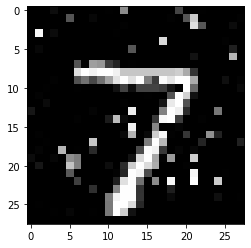

In [15]:
#1 设置上限
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if Func(BEST_X) < 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                    elif Func(BEST_X) >= 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if FITS_U[i] < Func(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.20598783 扰动程度 28.395225693992604
最优值： 0.21120606 扰动程度 28.2659664430322
最优值： 0.22194268 扰动程度 27.413408809940112
最优值： 0.22477005 扰动程度 27.250107870663786
最优值： 0.22477005 扰动程度 27.250107870663786
最优值： 0.22499861 扰动程度 27.23810930384119
最优值： 0.22791721 扰动程度 27.153951839000673
最优值： 0.23732293 扰动程度 26.822163230328766
最优值： 0.24344087 扰动程度 26.76986223253243
最优值： 0.25687197 扰动程度 26.16975137273472
最优值： 0.25807896 扰动程度 25.705453196095434
最优值： 0.26399937 扰动程度 25.607290092126878
最优值： 0.26399937 扰动程度 25.607290092126878
最优值： 0.27749646 扰动程度 25.231141447696647
最优值： 0.27922696 扰动程度 25.11227643027416
最优值： 0.27064207 扰动程度 24.9368370439431
最优值： 0.28048134 扰动程度 24.725152358132593
最优值： 0.30618364 扰动程度 24.332089681889865
最优值： 0.3022384 扰动程度 24.380524236043748
最优值： 0.331368 扰动程度 24.241708952983597
最优值： 0.3193657 扰动程度 24.12906161394036
最优值： 0.32401294 扰动程度 24.140564003332273
最优值： 0.3097579 扰动程度 23.751044356187393
最优值： 0.337192 扰动程度 23.41463334646428
最优值： 0.3467621 扰动程度 23.23897535494741
最优值： 0.3489799 扰动程度

最优值： 0.5078158 扰动程度 17.917370147696104
最优值： 0.50672317 扰动程度 17.937342930875268
最优值： 0.50927 扰动程度 17.877471962022344
最优值： 0.50927 扰动程度 17.877471962022344
最优值： 0.50927 扰动程度 17.877471962022344
最优值： 0.5088082 扰动程度 17.886162940871934
最优值： 0.5061212 扰动程度 17.96965204612253
最优值： 0.50998896 扰动程度 17.856606003920902
最优值： 0.5087871 扰动程度 17.8736306819044
最优值： 0.5092723 扰动程度 17.89184700844575
最优值： 0.50982636 扰动程度 17.85960694128571
最优值： 0.50938517 扰动程度 17.876994568440775
最优值： 0.50946903 扰动程度 17.87526098530163
最优值： 0.50955695 扰动程度 17.88018407947628
最优值： 0.51172924 扰动程度 17.846543040935234
最优值： 0.51172924 扰动程度 17.846543040935234
最优值： 0.512376 扰动程度 17.84680324177744
最优值： 0.49588543 扰动程度 17.99907829587023
最优值： 0.5012133 扰动程度 17.937791612397668
最优值： 0.5116132 扰动程度 17.848053134552583
最优值： 0.5134005 扰动程度 17.814191506304198
最优值： 0.51656944 扰动程度 17.732156252065707
最优值： 0.5142544 扰动程度 17.742745582577957
最优值： 0.51717085 扰动程度 17.729795018465573
最优值： 0.51730454 扰动程度 17.75391291834961
最优值： 0.51722264 扰动程度 17.730451

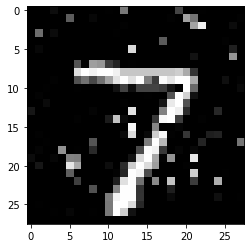

In [13]:
#1 设置上限（种群扩大）
MAX_GENERATION = 300  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if Func(BEST_X) < 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                    elif Func(BEST_X) >= 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if FITS_U[i] < Func(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.20823422 扰动程度 29.02424637224379
最优值： 0.20452465 扰动程度 28.53966584319259
最优值： 0.2242866 扰动程度 28.283372632262594
最优值： 0.20609036 扰动程度 28.27761142903625
最优值： 0.22618747 扰动程度 27.963825945176996
最优值： 0.21721528 扰动程度 27.677290488877738
最优值： 0.2180546 扰动程度 27.23988233900922
最优值： 0.23346324 扰动程度 27.019805334670053
最优值： 0.2326638 扰动程度 27.07992973272661
最优值： 0.2729706 扰动程度 26.629283524216543
最优值： 0.27404794 扰动程度 26.42481243304464
最优值： 0.2854644 扰动程度 26.159645120506585
最优值： 0.2875287 扰动程度 25.935288047020638
最优值： 0.27613163 扰动程度 25.85026695892421
最优值： 0.30699632 扰动程度 25.176410793882365
最优值： 0.3086524 扰动程度 24.689078782665135
最优值： 0.30776983 扰动程度 24.7342385941652
最优值： 0.30926448 扰动程度 24.630512195221094
最优值： 0.3034423 扰动程度 24.70012281355215
最优值： 0.28167868 扰动程度 24.582163468620806
最优值： 0.3118382 扰动程度 24.164441133111453
最优值： 0.3235997 扰动程度 23.963499538255043
最优值： 0.3345249 扰动程度 23.450916710976873
最优值： 0.3332715 扰动程度 23.50171543805699
最优值： 0.37114546 扰动程度 23.55351595710735
最优值： 0.35602698 扰动程度 23.

最优值： 0.40657562 扰动程度 20.697821435720414
最优值： 0.38658425 扰动程度 21.029099871361115
最优值： 0.40610933 扰动程度 20.72454780006776
最优值： 0.40385246 扰动程度 20.749914316145038
最优值： 0.4039024 扰动程度 20.745366202707142
最优值： 0.3981647 扰动程度 21.023608846223986
最优值： 0.40594602 扰动程度 20.707299487946354
最优值： 0.40154743 扰动程度 20.882117680680253
最优值： 0.40352616 扰动程度 20.572714772843437
最优值： 0.40491927 扰动程度 20.693400694601973
最优值： 0.4004739 扰动程度 20.920766321159366
最优值： 0.39895695 扰动程度 20.982547036055042
最优值： 0.4118024 扰动程度 20.645055816772455
最优值： 0.41482344 扰动程度 20.557955144809945
最优值： 0.3964487 扰动程度 20.986603083354023
最优值： 0.38785616 扰动程度 21.108836424807652
最优值： 0.41484934 扰动程度 20.5563850192697
最优值： 0.41461232 扰动程度 20.55576475538348
最优值： 0.42486623 扰动程度 20.15117157574587
最优值： 0.40969142 扰动程度 20.428312953153238
最优值： 0.41551596 扰动程度 20.494588040106766
最优值： 0.4155936 扰动程度 20.48999334982723
最优值： 0.43216047 扰动程度 19.98749528753271
最优值： 0.43014374 扰动程度 20.23768172805191
最优值： 0.40275753 扰动程度 20.97156335719321
最优值： 0.4337458 

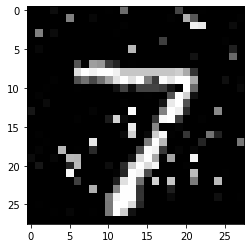

In [11]:
#1 设置上限-
MAX_GENERATION = 300  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if Func(BEST_X) < 0.4:
                    if DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                elif Func(BEST_X) >= 0.4:
                    if FITS[i] >= FITS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        if FITS_U[i] < Func(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.18798633 扰动程度 28.956815160212557
最优值： 0.19968076 扰动程度 28.797889494099003
最优值： 0.20535068 扰动程度 28.080023300926555
最优值： 0.20643076 扰动程度 27.91041903806346
最优值： 0.20643076 扰动程度 27.91041903806346
最优值： 0.21665254 扰动程度 27.774956994186496
最优值： 0.22278877 扰动程度 27.534226770159346
最优值： 0.2236764 扰动程度 27.40103507663915
最优值： 0.22898664 扰动程度 27.091758482889873
最优值： 0.24266721 扰动程度 26.725967840386193
最优值： 0.24519193 扰动程度 26.646470040290758
最优值： 0.25471613 扰动程度 26.373075468254296
最优值： 0.2565683 扰动程度 26.31790234707609
最优值： 0.28053463 扰动程度 26.271424929276318
最优值： 0.25564554 扰动程度 26.19541110124235
最优值： 0.27255705 扰动程度 25.90289446579812
最优值： 0.27413577 扰动程度 25.398503186484792
最优值： 0.28097257 扰动程度 24.740059631175697
最优值： 0.28028443 扰动程度 24.81924441920176
最优值： 0.32502353 扰动程度 24.04830708326529
最优值： 0.33878735 扰动程度 24.037179805630835
最优值： 0.330502 扰动程度 23.8066958588217
最优值： 0.3473134 扰动程度 23.515570833562528
最优值： 0.3533874 扰动程度 23.349618577864213
最优值： 0.35379672 扰动程度 23.3475197666062
最优值： 0.3422859 扰动程

最优值： 0.45239955 扰动程度 20.65645059457365
最优值： 0.45035517 扰动程度 20.783197570624353
最优值： 0.45380646 扰动程度 20.628995131317755
最优值： 0.45210195 扰动程度 20.6490937123478
最优值： 0.4611452 扰动程度 20.447599699480328
最优值： 0.43916568 扰动程度 21.044973325605195
最优值： 0.4503415 扰动程度 20.692147305717434
最优值： 0.4536503 扰动程度 20.609593981996824
最优值： 0.4509324 扰动程度 20.625782652443498
最优值： 0.42945442 扰动程度 20.690337229526634
最优值： 0.42866683 扰动程度 20.71919233035127
最优值： 0.42925414 扰动程度 20.698417161000098
最优值： 0.4294567 扰动程度 20.67869914729347
最优值： 0.42988408 扰动程度 20.681356579701113
最优值： 0.4331881 扰动程度 20.707591552726143
最优值： 0.429355 扰动程度 20.692576177935937
最优值： 0.42876902 扰动程度 20.6586037841285
最优值： 0.4276918 扰动程度 20.696177394368906
最优值： 0.43210998 扰动程度 20.64124112793583
最优值： 0.4269921 扰动程度 20.72553853606625
最优值： 0.4390991 扰动程度 20.5298367551513
最优值： 0.41056398 扰动程度 21.0765100945936
最优值： 0.42377722 扰动程度 20.875591471258996
最优值： 0.4274368 扰动程度 20.692686127716563
最优值： 0.42579895 扰动程度 20.69180353532435
最优值： 0.42682266 扰动程度 20.70

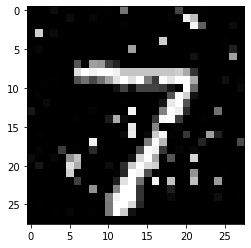

In [13]:
#1 设置上限-
MAX_GENERATION = 300  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if Func(BEST_X) < 0.4:
                    if DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                elif Func(BEST_X) >= 0.4:
                    if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.18804109 扰动程度 28.481914736592593
最优值： 0.2083501 扰动程度 28.409237387992597
最优值： 0.20863907 扰动程度 27.894522564547593
最优值： 0.21112165 扰动程度 27.804432502587996
最优值： 0.22087663 扰动程度 27.66295950047619
最优值： 0.22157066 扰动程度 27.612286006820266
最优值： 0.25792444 扰动程度 26.36224233219318
最优值： 0.25734842 扰动程度 26.42722375287836
最优值： 0.24667914 扰动程度 26.350451405974212
最优值： 0.23585615 扰动程度 26.095497961411166
最优值： 0.2662957 扰动程度 25.561956894634168
最优值： 0.26772302 扰动程度 25.463417947685368
最优值： 0.2864359 扰动程度 25.45974531873858
最优值： 0.2688614 扰动程度 25.26987644978377
最优值： 0.31792212 扰动程度 24.97312315587405
最优值： 0.31745094 扰动程度 24.030029776018452
最优值： 0.31638625 扰动程度 24.053139351839455
最优值： 0.3198962 扰动程度 23.83889558117025
最优值： 0.32072952 扰动程度 23.802259880153198
最优值： 0.36746415 扰动程度 23.614058376392503
最优值： 0.32922485 扰动程度 23.378799822990686
最优值： 0.34186298 扰动程度 23.08386462710787
最优值： 0.3281768 扰动程度 22.94583513969886
最优值： 0.33244994 扰动程度 22.809194067466933
最优值： 0.33745113 扰动程度 22.768791803532455
最优值： 0.4129052 

最优值： 0.44511223 扰动程度 20.62081721329333
最优值： 0.4444868 扰动程度 20.632034733524485
最优值： 0.45540652 扰动程度 20.41566883491152
最优值： 0.4547329 扰动程度 20.499665862562097
最优值： 0.45214704 扰动程度 20.446358542764003
最优值： 0.44417644 扰动程度 20.6492346650504
最优值： 0.44685033 扰动程度 20.56687166699789
最优值： 0.450488 扰动程度 20.365629811071795
最优值： 0.4496276 扰动程度 20.380456877755545
最优值： 0.44911453 扰动程度 20.5339856612774
最优值： 0.4512138 扰动程度 20.48974392065486
最优值： 0.44991586 扰动程度 20.492199800273312
最优值： 0.44104722 扰动程度 20.746171455485413
最优值： 0.44552132 扰动程度 20.59484908760949
最优值： 0.44161037 扰动程度 20.657890080139687
最优值： 0.44256398 扰动程度 20.7073072877713
最优值： 0.44029045 扰动程度 20.743364817633022
最优值： 0.446574 扰动程度 20.56423707922913
最优值： 0.4507236 扰动程度 20.52034455464007
最优值： 0.44389609 扰动程度 20.631952119732567
最优值： 0.443775 扰动程度 20.66010734118263
最优值： 0.44674525 扰动程度 20.630810109191444
最优值： 0.44599018 扰动程度 20.648084698003203
最优值： 0.44538167 扰动程度 20.599198290098563
最优值： 0.44489884 扰动程度 20.61920954577507
最优值： 0.4465902 扰动程度 20.582

最优值： 0.4446238 扰动程度 20.51219968177371
最优值： 0.44774947 扰动程度 20.398462737979372
最优值： 0.4431083 扰动程度 20.45789161774455
最优值： 0.43667608 扰动程度 20.517021778282484
最优值： 0.44306424 扰动程度 20.456740155609523
最优值： 0.4673828 扰动程度 20.06914781960114
最优值： 0.44327107 扰动程度 20.445357131408485
最优值： 0.44045088 扰动程度 20.524039200120782
最优值： 0.44482464 扰动程度 20.41668064643474
最优值： 0.44298834 扰动程度 20.460279728773152
最优值： 0.44302544 扰动程度 20.459709353978553
最优值： 0.4427586 扰动程度 20.483071096688988
最优值： 0.44362918 扰动程度 20.448668068312536
最优值： 0.4431318 扰动程度 20.4478681388729
最优值： 0.4493988 扰动程度 20.22939649149643
最优值： 0.4437553 扰动程度 20.43683544991658
最优值： 0.44299266 扰动程度 20.461799713730315
最优值： 0.439686 扰动程度 20.518365267171156
最优值： 0.44256467 扰动程度 20.47476410413391
最优值： 0.44540912 扰动程度 20.39391648420515
最优值： 0.44430277 扰动程度 20.4404257255155
最优值： 0.44168586 扰动程度 20.496754748919926
最优值： 0.43980074 扰动程度 20.613399920025497
最优值： 0.44355485 扰动程度 20.452112310263374
最优值： 0.44298372 扰动程度 20.447440949821875
最优值： 0.44514325 扰动程度 

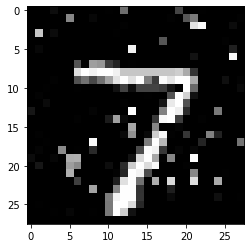

In [13]:
#1 设置上限-
MAX_GENERATION = 500  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if Func(BEST_X) < 0.4:
                    if DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                elif Func(BEST_X) >= 0.4:
                    if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.2046528 扰动程度 28.899182453992605
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.19568942 扰动程度 28.003692688232803
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20275803 扰动程度 27.609327207473804
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20177887 扰动程度 27.569852029966
最优值： 0.20006566 扰动程度 27.659735072617003
最优值： 0.20125012 扰动程度 27.6477186237764
最优值： 0.2066256 扰动程度 27.467410315944
最优值： 0.20404005 扰动程度 27.5711130755248
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.19883831 扰动程度 27.899743061984623
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.2030444 扰动程度 27.4704111218146
最优值： 0.19890352 扰动程度 27.749648484934603
最优值： 0.19751452 扰动程度 27.818481643076602
最优值： 0.20342505 扰动程度 27.5402382260938
最优值： 0.20177887 扰动程度 27.569852029966
最优值： 0.19850513 扰动程度 27.749158825417602
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20152135 扰动程度 27.6276907067926
最优值： 0.20295066 扰动程度 27.5641830797908
最优

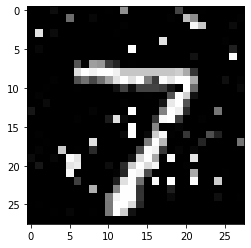

In [17]:
#2
MAX_GENERATION = 100  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.22404997 扰动程度 28.169120159792605
最优值： 0.22649483 扰动程度 27.868901298050403
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.22692564 扰动程度 27.804280046521203
最优值： 0.24905427 扰动程度 27.734127986824205
最优值： 0.25748032 扰动程度 27.365575497118744
最优值： 0.28001806 扰动程度 27.170578040361185
最优值： 0.2871664 扰动程度 27.081834170987
最优值： 0.29162744 扰动程度 26.9711854017158
最优值： 0.2531252 扰动程度 26.751101386520567
最优值： 0.29480082 扰动程度 26.223946337451633
最优值： 0.31156906 扰动程度 25.627329928594154
最优值： 0.31149566 扰动程度 25.643158903270862
最优值： 0.31492594 扰动程度 25.47480777394885
最优值： 0.3099724 扰动程度 25.24341427742928
最优值： 0.30826995 扰动程度 24.900869358202883
最优值： 0.30888087 扰动程度 24.92201093913507
最优值： 0.33807003 扰动程度 24.458630696943004
最优值： 0.33639446 扰动程度 24.54209050010277
最优值： 0.33764747 扰动程度 24.080097051698562
最优值： 0.34118104 扰动程度 23.915027337440566
最优值： 0.37426662 扰动程度 23.783477939254198
最优值： 0.3702818 扰动程度 23.363908518082955
最优值： 0.38184118 扰动程度 23.153494085642006
最优值： 0.456127

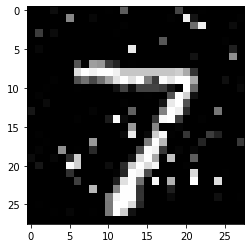

In [12]:
#2
MAX_GENERATION = 50  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                    if DIS_U[i] < Dis(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

In [ ]:
#2 设置上限
MAX_GENERATION = 200  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if Func(BEST_X) < 0.4:
                    if DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                elif Func(BEST_X) >= 0.4:
                    if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                        X[i, :] = U[i, :]
                        FITS[i] = FITS_U[i]
                        if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

最优值： 0.25231203 扰动程度 27.178107242592596
最优值： 0.25231203 扰动程度 27.178107242592596
最优值： 0.25581402 扰动程度 26.97954274525813
最优值： 0.25901014 扰动程度 26.895076582002694
最优值： 0.27981406 扰动程度 26.638799238172993
最优值： 0.27981406 扰动程度 26.638799238172993
最优值： 0.28862533 扰动程度 26.725374740521918
最优值： 0.25612113 扰动程度 26.583931690584908
最优值： 0.27225736 扰动程度 26.10693403712419
最优值： 0.27424455 扰动程度 26.024382489035986
最优值： 0.3242476 扰动程度 25.967659152188897
最优值： 0.32487008 扰动程度 25.291104531530394
最优值： 0.30186954 扰动程度 25.072390483973564
最优值： 0.3339778 扰动程度 25.07099656859458
最优值： 0.33825305 扰动程度 24.70287514362666
最优值： 0.33682054 扰动程度 24.611057307207528
最优值： 0.3712909 扰动程度 24.440052444400365
最优值： 0.35519868 扰动程度 24.355392358717978
最优值： 0.35398605 扰动程度 24.0557623087753
最优值： 0.42928666 扰动程度 23.61955139934601
最优值： 0.4306509 扰动程度 23.76147690543489
最优值： 0.43051973 扰动程度 23.587763273729205
最优值： 0.43118462 扰动程度 23.58099659486269
最优值： 0.42928666 扰动程度 23.61955139934601
最优值： 0.42928666 扰动程度 23.61955139934601
最优值： 0.4294556 

最优值： 0.42960626 扰动程度 22.5679855109066
最优值： 0.43765628 扰动程度 22.41461708640945
最优值： 0.43357074 扰动程度 22.468833129701697
最优值： 0.43239075 扰动程度 22.49614853821927
最优值： 0.4311341 扰动程度 22.54851511987137
最优值： 0.42906612 扰动程度 22.51281848154274
最优值： 0.4285002 扰动程度 22.446193939285134
最优值： 0.4239491 扰动程度 22.54645716079911
最优值： 0.42010534 扰动程度 22.578898580897985
最优值： 0.43904018 扰动程度 22.212314826988106
最优值： 0.42638364 扰动程度 22.554383420793524
最优值： 0.4285002 扰动程度 22.446193939285134
最优值： 0.42855433 扰动程度 22.44460524457677
最优值： 0.42845008 扰动程度 22.427240868851182
最优值： 0.42845008 扰动程度 22.427240868851182
最优值： 0.42737287 扰动程度 22.422753188099975
最优值： 0.42155287 扰动程度 22.59978003592065
最优值： 0.42278337 扰动程度 22.588803296672715
最优值： 0.4269378 扰动程度 22.43964241608105
最优值： 0.4353011 扰动程度 22.352347105778417
最优值： 0.4260178 扰动程度 22.518259085180166
最优值： 0.42737287 扰动程度 22.422753188099975
最优值： 0.42284116 扰动程度 22.496049279380255
最优值： 0.42505714 扰动程度 22.48565006476594
最优值： 0.42847455 扰动程度 22.39600447422018
最优值： 0.44655624 扰动程

Exception ignored in: <function ScopedTFGraph.__del__ at 0x0000028FA7BE13A0>
Traceback (most recent call last):
  File "D:\Anaconda\envs\pytorch\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 54, in __del__
    self.deleter(self.graph)
KeyboardInterrupt: 


最优值： 0.42825425 扰动程度 22.268242816769984
最优值： 0.42998564 扰动程度 22.273531551948224
最优值： 0.43031356 扰动程度 22.339996449263715


最优值： 0.24782494 扰动程度 28.081578278792602
最优值： 0.23801224 扰动程度 28.000826440332155
最优值： 0.24876928 扰动程度 28.003317873851
最优值： 0.24753857 扰动程度 27.54566395235215
最优值： 0.25763163 扰动程度 27.358858573172995
最优值： 0.30478328 扰动程度 27.221569818830943
最优值： 0.29522052 扰动程度 26.77844675272186
最优值： 0.33627105 扰动程度 26.70882310790607
最优值： 0.29726386 扰动程度 26.524257699246004
最优值： 0.30541033 扰动程度 26.340383665579832
最优值： 0.30060062 扰动程度 26.010627895308417
最优值： 0.30856898 扰动程度 25.53668515160166
最优值： 0.3059271 扰动程度 25.37534448990913
最优值： 0.30551705 扰动程度 25.418997975535913
最优值： 0.3073579 扰动程度 25.354224612219756
最优值： 0.3874962 扰动程度 25.052145493205764
最优值： 0.38964504 扰动程度 24.90696587176746
最优值： 0.37087935 扰动程度 24.49730234282426
最优值： 0.3873868 扰动程度 24.17886216006397
最优值： 0.39476192 扰动程度 24.055371033006885
最优值： 0.35388556 扰动程度 23.710552322249033
最优值： 0.39637455 扰动程度 23.957617122815083
最优值： 0.3695948 扰动程度 23.558959964277925
最优值： 0.3973805 扰动程度 23.852364859725622
最优值： 0.37496376 扰动程度 23.26860512294882
最优值： 0.3840969 扰动程

最优值： 0.60257214 扰动程度 18.512265477390727
最优值： 0.60700953 扰动程度 18.45483862089946
最优值： 0.609017 扰动程度 18.388733147055586
最优值： 0.6084246 扰动程度 18.40119720620619
最优值： 0.60899496 扰动程度 18.389077889875324
最优值： 0.60915345 扰动程度 18.38758539523039
最优值： 0.6103764 扰动程度 18.381515189833628
最优值： 0.61161023 扰动程度 18.367057449260177
最优值： 0.6111672 扰动程度 18.380471906153158
最优值： 0.611628 扰动程度 18.36092541904955
最优值： 0.61211 扰动程度 18.357124192582425
最优值： 0.6118054 扰动程度 18.36646610520455
最优值： 0.6120969 扰动程度 18.357333285444223
最优值： 0.61206037 扰动程度 18.357406004633656
最优值： 0.6123919 扰动程度 18.34592219300855
最优值： 0.6117859 扰动程度 18.347230845258306
最优值： 0.61302567 扰动程度 18.32405804980394
最优值： 0.6262911 扰动程度 18.191093835807155
最优值： 0.6262862 扰动程度 18.189992895037346
最优值： 0.6262862 扰动程度 18.189992895037346
最优值： 0.6270672 扰动程度 18.154736219537305
最优值： 0.62710655 扰动程度 18.154398695429965
最优值： 0.6293257 扰动程度 18.116277356761454
最优值： 0.62943876 扰动程度 18.114675240771508
最优值： 0.6299588 扰动程度 18.106711188286088
最优值： 0.62329394 扰动程度 18.179

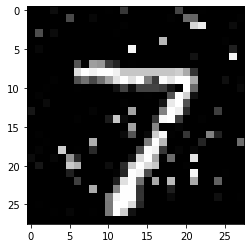

In [14]:
#2 设置上限（迭代增大）
MAX_GENERATION = 300  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 50  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        DIS = np.zeros(N)
        DIS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des1, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:       
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                # 变异向量V[i, :]
                # 变异向量的基使用每次适应度值最好的个体BEST_X
                # V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :]) + SIGMA * (X[r[2], :] - X[r[3], :])
                # V[i, :] = BEST_X + SIGMA * ((X[r[0], :] - X[r[1], :]) + (X[r[2], :] - X[r[3], :]))
                # SIGMA过大 无法收敛
                # SIGMA过小 早熟
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        #print(V[i, j])
                        V[i, j] = 1-(V[i, j]-1)
                        #print(V[i, j])
            # print(V)
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                DIS[i] = Dis(X[i])
                DIS_U[i] = Dis(U[i])
                # 变异的种子表现更好
                #if FITS[i] >= FITS_U[i] and DIS[i] >= DIS_U[i]:
                if DIS[i] >= DIS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if Func(BEST_X) < 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if DIS_U[i] < Dis(BEST_X):
                            BEST_X = U[i, :]
                    elif Func(BEST_X) >= 0.4:
                        #if FITS_U[i] < Func(BEST_X) and DIS_U[i] < Dis(BEST_X):
                        if FITS_U[i] < Func(BEST_X):
                            BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X),"扰动程度",Dis(BEST_X))
        if GENERATION == MAX_GENERATION:
            BEST = BEST_X+x_test[0]/255
            print(BEST_X)
            plt.imshow(BEST.reshape(28,28),cmap='gray')
            plt.show()
            break

迭代: 1
置信度： 0.15102999


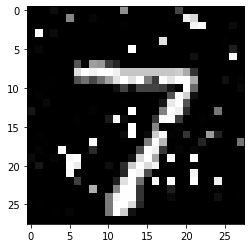

迭代: 2
置信度： 0.1528463


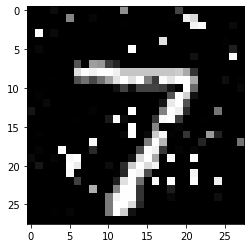

迭代: 3
置信度： 0.15459083


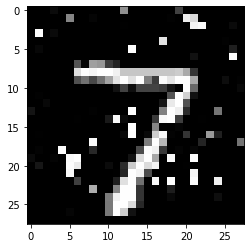

迭代: 4
置信度： 0.15696447


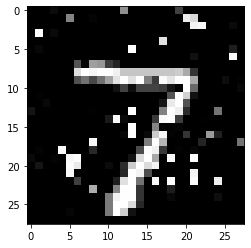

迭代: 5
置信度： 0.1594971


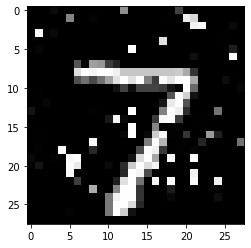

迭代: 6
置信度： 0.16164714


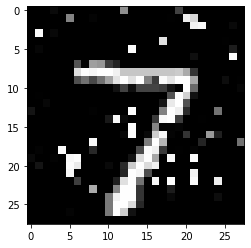

迭代: 7
置信度： 0.16339055


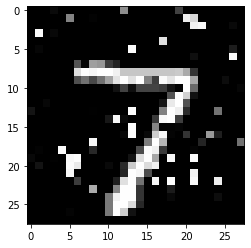

迭代: 8
置信度： 0.16560218


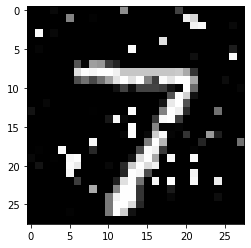

迭代: 9
置信度： 0.16799982


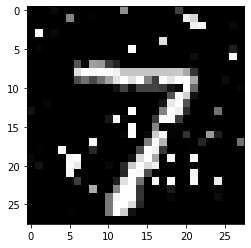

迭代: 10
置信度： 0.17016259


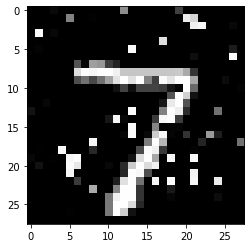

迭代: 11
置信度： 0.17252384


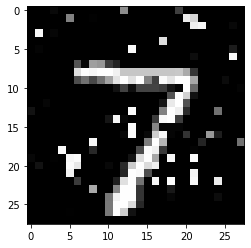

迭代: 12
置信度： 0.17493162


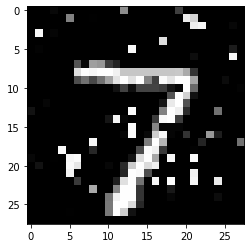

迭代: 13
置信度： 0.17770956


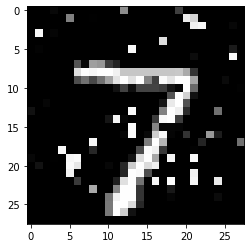

迭代: 14
置信度： 0.18039194


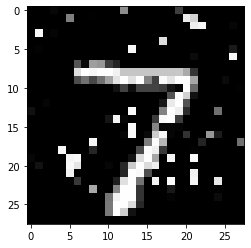

迭代: 15
置信度： 0.18317698


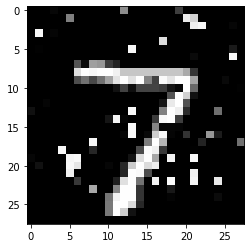

迭代: 16
置信度： 0.18557252


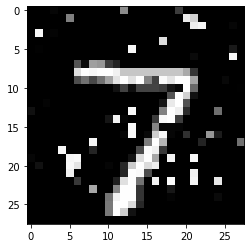

迭代: 17
置信度： 0.18781427


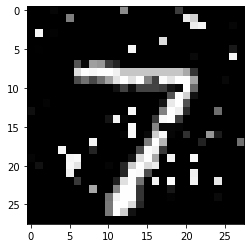

迭代: 18
置信度： 0.19029912


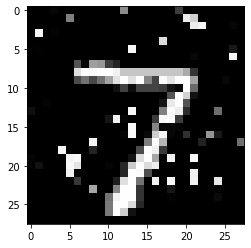

迭代: 19
置信度： 0.19269252


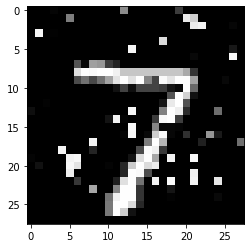

迭代: 20
置信度： 0.19501093


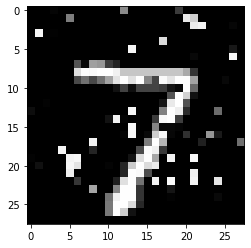

迭代: 21
置信度： 0.19732259


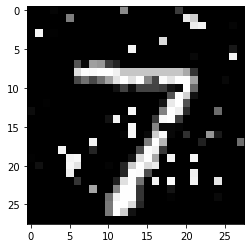

迭代: 22
置信度： 0.20018703


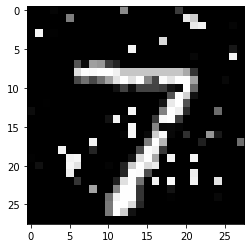

迭代: 23
置信度： 0.20254013


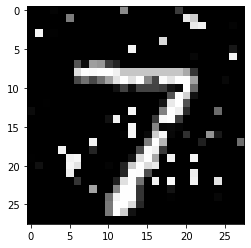

迭代: 24
置信度： 0.20480736


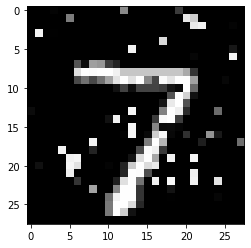

迭代: 25
置信度： 0.20728181


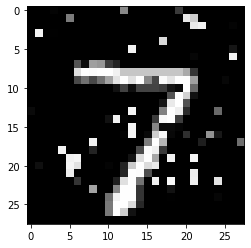

迭代: 26
置信度： 0.20980096


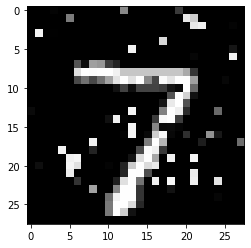

迭代: 27
置信度： 0.21229121


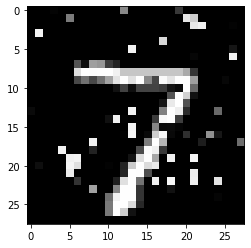

迭代: 28
置信度： 0.21457027


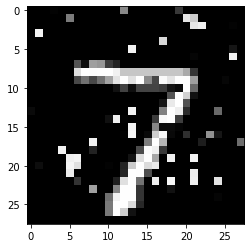

迭代: 29
置信度： 0.21755789


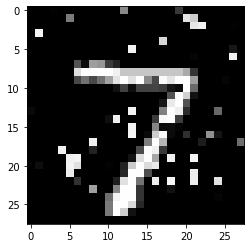

迭代: 30
置信度： 0.22036526


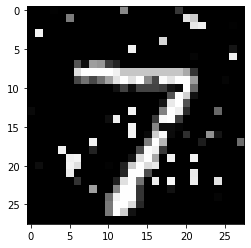

迭代: 31
置信度： 0.22247374


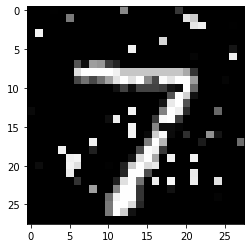

迭代: 32
置信度： 0.22500134


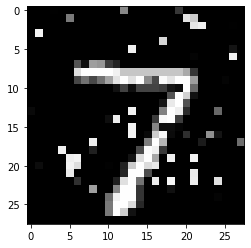

迭代: 33
置信度： 0.22716704


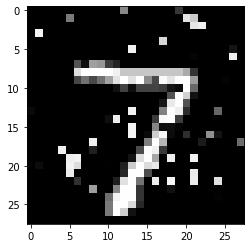

迭代: 34
置信度： 0.22977602


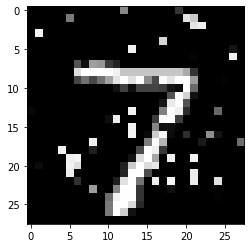

迭代: 35
置信度： 0.23235819


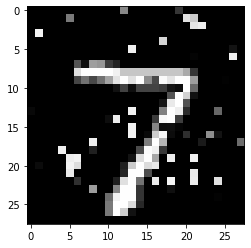

迭代: 36
置信度： 0.234726


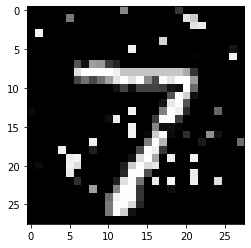

迭代: 37
置信度： 0.23738612


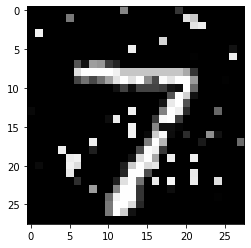

迭代: 38
置信度： 0.23989974


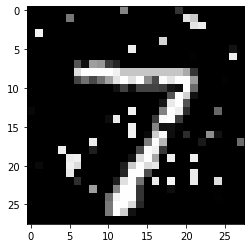

迭代: 39
置信度： 0.24269125


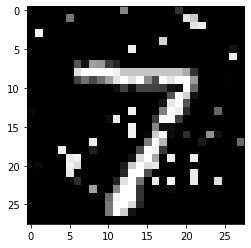

迭代: 40
置信度： 0.2455143


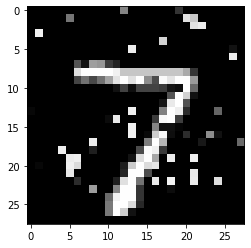

迭代: 41
置信度： 0.24863967


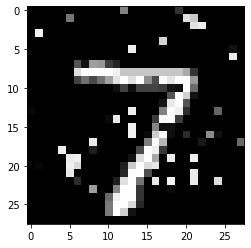

迭代: 42
置信度： 0.24999268


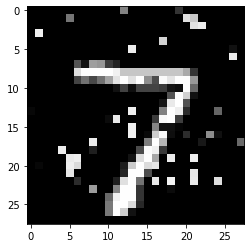

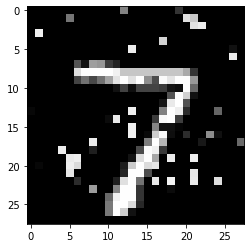

最终置信度： 0.24999268
[3.5068286e-03 1.1739271e-03 2.3195313e-01 4.8491693e-01 1.5232248e-04
 1.4322293e-02 3.6108479e-05 2.4999268e-01 1.1965757e-02 1.9801634e-03]


In [11]:
import copy
x_d3 = x_dif
x_t = x_d3
E = 0.25
count = 0
for t in range(100):     # 累计迭代次数
    for k in range(100):      # 未能维持置信度的循环上限
        x_d3 = copy.deepcopy(x_t)
        for i in range(784):    # 误差减小操作
             if x_d3[i] > 0.00000000e+00:
                x_d3[i] = x_d3[i] - random.randint(0,3)/1000
                if x_d3[i] < 0:
                    x_d3[i] = 0
        
             elif x_d3[i] < 0.00000000e+00:
                x_d3[i] = x_d3[i] + random.randint(0,3)/1000
                if x_d3[i] > 0:
                    x_d3[i] = 0
        if Func(x_d3) < E:
            x_t = x_d3
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_d3))
            t3 = x_t+x_test[0]/255
            plt.imshow(t3.reshape(28,28),cmap='gray')
            plt.show()
            break
        else:
            #print(Func(x_d3))
            continue
    
t3 = x_t+x_test[0]/255
plt.imshow(t3.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(t3.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.14939691
0.1699071
0.14939691
0.16064724
0.14939691
0.16302323
0.15108065
0.1536521
0.14939691
0.22835116
0.14939691
0.14939691
0.14939691
0.15634914
0.14939691
0.14950995
0.1699173
0.16539906
0.15108104
0.18015164
0.14939691
0.14939691
0.14950995
0.15196444
0.14939691
0.14939691
0.18477942
0.14939691
0.17685303
0.14939691
0.14939691
0.14990023
0.14939691
0.16035
0.1942508
0.15817787
0.14939691
0.15047155
0.14939691
0.15108065
0.14939691
0.14950995
0.22181065
0.14891599
迭代: 1
置信度： 0.14891599


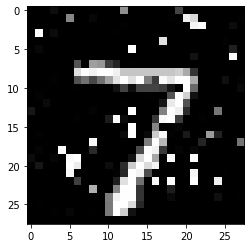

0.14891599
0.1491119
0.14891599
0.20639893
0.14891599
0.14891599
0.14891599
0.16254388
0.14891599
0.16497006
0.14889853
迭代: 2
置信度： 0.14889853


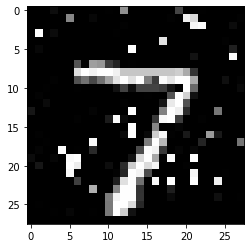

0.14897805
0.14908014
0.14908014
0.17555514
0.14899126
0.14908014
0.1555958
0.14909515
0.14944987
0.16201341
0.18729326
0.15750462
0.14889853
0.14889853
0.14889853
0.1519281
0.14889853
0.20930457
0.14889853
0.15126327
0.17212678
0.17442663
0.15166539
0.22832035
0.14889853
0.15745647
0.15852521
0.14889853
0.14889853
0.14889853
0.14889853
0.1589689
0.14889853
0.14889853
0.15300372
0.15505081
0.14889853
0.18635449
0.14889853
0.14889853
0.16522485
0.14889853
0.16959332
0.14889853
0.15174891
0.19310394
0.14889853
0.14889853
0.14909515
0.1869024
0.15134753
0.14889853
0.15134753
0.14889853
0.17780149
0.14889853
0.15088718
0.14889853
0.14889853
0.15577258
0.14889853
0.14889853
0.14889853
0.15066178
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.16505866
0.14932421
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.15134753
0.1557795
0.14889853
0.14889853
0.14889853
0.18483211
0.14889853
0.17934047
0.15078889
0.14917405
0.14

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001990557A550>
Traceback (most recent call last):
  File "D:\Anaconda\envs\pytorch\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


0.14889853
0.14889853
0.16140468
0.14889853
0.19045725
0.14889853
0.14889853
0.14889853
0.14889853
0.15599084
0.15407471
0.14889853
0.15066178
0.15166539
0.14889853
0.14889853
0.14889853
0.16097417
0.14889853
0.14889853
0.15388839
0.14889853
0.15615296
0.15438373
0.15850103
0.14889853
0.19969033
0.15483615
0.14889853
0.14889853
0.14889853
0.14889853
0.16201341
0.14909515
0.17141443
0.14889853
0.19227122
0.15035468
0.15149675
0.14889853
0.1555958
0.23097415
0.15880097
0.14889853
0.15185054
0.14889853
0.14889853
0.14932421
0.14889853
0.14889853
0.15006387
0.14889853
0.14889853
0.14889853
0.14889853
0.14889853
0.1555958
0.15190989
0.16180906
0.18965885
0.15407471
0.14995258
0.14897805
0.14889853
0.1543161
0.14889853
0.14889853
0.14889853
0.15415722
0.14889853
0.16608922
0.14889853
0.15508537
0.14899126
0.17518525
0.15405649
0.14889853
0.15457433
0.15741839
0.14889853
0.14889853
0.1499632
0.15106843
0.14889853
0.15066178
0.14889853
0.14889853
0.17157926
0.14889853
0.15280674
0.14889853
0.1

In [ ]:
# 原图改变值减小置信度
x_t = copy.deepcopy(x_dif)
count = 0
for t in range(10):
    x_f = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.3:
                        if abs(x_f[i]) >= 0.8:
                            if x_f[i] > 0:
                                x_f[i] = random.randint(1,8)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(1,8)/10
                        elif abs(x_f[i]) < 0.8 and abs(x_f[i]) >= 0.1:
                            if x_f[i] > 0:
                                x_f[i] = random.randint(0,1)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(0,1)/10
                    if y <= 0.3:
                        x_f[i] = 0 
        print(Func(x_f))
        con += 1
        if Func(x_f) < Func(x_t):
            x_t = x_f
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f = x_t+x_test[0]/255
            plt.imshow(f.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
F = x_t+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(F.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

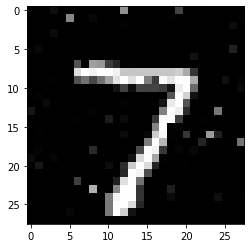

置信度： 0.9905353
[3.4097058e-04 6.8650523e-05 2.7454228e-03 4.5429049e-03 3.3036533e-05
 4.5153088e-04 2.2833087e-06 9.9053532e-01 1.9898760e-04 1.0809292e-03]


In [48]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) > 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

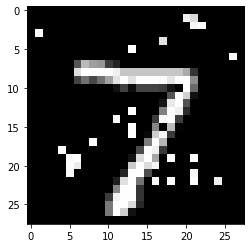

置信度： 0.3893921
[2.0558969e-03 9.4956340e-04 1.9136420e-01 3.9770034e-01 1.0873449e-04
 9.4524734e-03 1.6104059e-05 3.8939211e-01 7.2888527e-03 1.6716478e-03]


In [9]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) < 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

0.7532865
0.4889717
0.5027556
0.6872612
0.41092217
0.55867875
0.5592632
0.55446494
0.43673283
0.4908534
0.61393166
0.572012
0.45296532
0.70098495
0.62949336
0.4281742
0.39883238
0.54716027
0.48560932
0.6098192
0.5382706
0.5914648
0.51619345
0.48592123
0.48876065
0.48393255
0.5493107
0.5376365
0.40425614
0.7472338
0.5803521
0.44859764
0.83785945
0.6572758
0.57630765
0.3893921
0.74396574
0.5667778
0.47356617
0.501821
0.39437097
0.59971213
0.5224451
0.522243
0.6466309
0.6863635
0.5847432
0.41176164
0.5420972
0.55111945
0.66160256
0.557148
0.5238389
0.42281115
0.6060554
0.6155197
0.4728897
0.5887132
0.5687732
0.6560871
0.46363866
0.43110698
0.45651335
0.5517517
0.72012645
0.49412385
0.583757
0.68008757
0.3893921
0.5058125
0.5124957
0.4069887
0.58433527
0.44531104
0.6934921
0.44210556
0.4273637
0.3893921
0.42849514
0.3893921
0.6422042
0.5215052
0.55508643
0.4661828
0.6808048
0.4096288
0.59276
0.6113185
0.61301035
0.5886052
0.3893921
0.559101
0.5794053
0.5361211
0.5070408
0.56044
0.60035884


0.40212056
0.48138255
0.43988174
0.523553
0.40113372
0.51268697
0.5646449
0.47364762
0.7501834
0.5118009
0.5785504
0.59242684
0.4577905
0.45161024
0.5927413
0.41176164
0.4456892
0.64833564
0.6273196
0.48843884
0.58452964
0.3893921
0.5120709
0.6763055
0.42993098
0.6497851
0.40425614
0.6365418
0.49874946
0.3893921
0.6525099
0.728773
0.6123105
0.58010143
0.5634052
0.43156984
0.6615056
0.44852298
0.5192822
0.50453585
0.3893921
0.63708115
0.60973746
0.8716926
0.5794053
0.47409648
0.3893921
0.55004704
0.5819888
0.57755286
0.47827953
0.48628512
0.54133457
0.47098848
0.44250107
0.47605613
0.53021705
0.5434748
0.68303084
0.52730846
0.499269
0.47364762
0.5231229
0.5886052
0.55961555
0.45161024
0.4456892
0.3893921
0.51628363
0.8105205
0.43995816
0.4180919
0.42114916
0.45161024
0.46705586
0.3893921
0.512375
0.6699917
0.4083414
0.42520958
0.45694822
0.47336963
0.6757161
0.462669
0.4310348
0.6085266
0.48343864
0.46927932
0.6484434
0.41500765
0.7728787
0.681894
0.8089918
0.63100624
0.5552301
0.475392

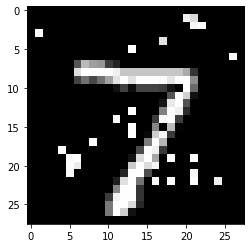

最终置信度： 0.3893921
[2.0558969e-03 9.4956340e-04 1.9136420e-01 3.9770034e-01 1.0873449e-04
 9.4524734e-03 1.6104059e-05 3.8939211e-01 7.2888527e-03 1.6716478e-03]


In [10]:
# 改变值减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(10):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.8:
                        if x_f1[i] > 0:
                            x_f1[i] = random.randint(1,8)/10
                        elif x_f1[i] < 0:
                            x_f1[i] = -random.randint(1,8)/10
                    if y <= 0.8:
                        x_f1[i] = 0 
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.59630513
0.42690742
0.50655967
0.6110832
0.5102631
0.4490917
0.4811933
0.41749603
0.48189637
0.48310712
0.6084928
0.55325955
0.49101678
0.5368255
0.65057594
0.5650886
0.46163395
0.6459118
0.5527594
0.5802988
0.4306779
0.4475693
0.59338814
0.44361398
0.3893921
0.6320245
0.4863194
0.530641
0.46962252
0.5475177
0.6782748
0.5233284
0.47742048
0.58011967
0.78267556
0.4811413
0.72664726
0.44941983
0.4607407
0.44343105
0.64572215
0.45135823
0.357111
迭代: 1
置信度： 0.357111


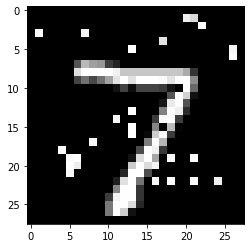

0.4501279
0.56702906
0.35094333
迭代: 2
置信度： 0.35094333


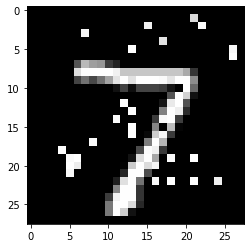

0.62401897
0.564439
0.6460109
0.59652275
0.38063774
0.51129085
0.47265136
0.3952677
0.43314457
0.5211361
0.4132208
0.46498698
0.5382431
0.35094333
0.7596984
0.52360106
0.66665107
0.46729994
0.66365004
0.6718668
0.55666965
0.4734209
0.62558544
0.33762214
迭代: 3
置信度： 0.33762214


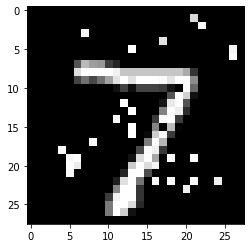

0.38150403
0.55845296
0.36095196
0.35536823
0.44096097
0.582699
0.6896035
0.43962097
0.38415182
0.43432802
0.36127612
0.55919385
0.49067044
0.35589018
0.4401271
0.68856573
0.40126503
0.57792646
0.54878706
0.40333578
0.3692772
0.43608224
0.54133445
0.33279938
迭代: 4
置信度： 0.33279938


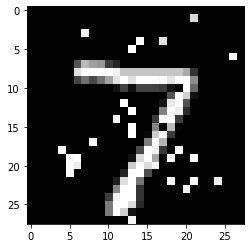

0.36672518
0.7801865
0.4055264
0.40779218
0.37559772
0.6106753
0.4269613
0.42479825
0.3631115
0.40343523
0.3861339
0.39244998
0.6310451
0.61182725
0.4014935
0.5358465
0.6418313
0.5152161
0.3932357
0.68036884
0.4942761
0.68561286
0.4541422
0.35983083
0.4222768
0.3033384
迭代: 5
置信度： 0.3033384


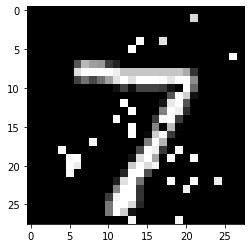

0.5055596
0.35152477
0.42703286
0.57683855
0.5527859
0.5089292
0.49742022
0.45548594
0.45553392
0.38716877
0.56366163
0.5216532
0.4216905
0.47596458
0.56663054
0.26071215
迭代: 6
置信度： 0.26071215


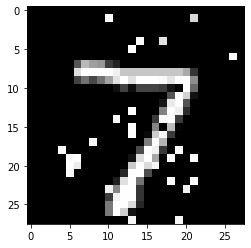

0.38915667
0.46627158
0.30774114
0.3760725
0.46798077
0.41780913
0.5996617
0.37313756
0.28593427
0.58584315
0.4575459
0.5035284
0.669057
0.50120145
0.32343978
0.3023405
0.36605617
0.30329552
0.2837726
0.72872514
0.4867738
0.27053976
0.4617032
0.3709583
0.42575625
0.37753224
0.42242527
0.35491413
0.60179824
0.29675466
0.27512306
0.37870476
0.3411256
0.36926568
0.45083895
0.3033191
0.55237764
0.3288501
0.4846503
0.3697255
0.2743728
0.26071215
0.49909517
0.46894893
0.41345617
0.690285
0.4968244
0.3885019
0.39252532
0.7438526
0.3241215
0.39335495
0.26071215
0.26071215
0.39613897
0.5600746
0.28134796
0.3602227
0.63405
0.34301856
0.36035663
0.26071215
0.46597663
0.31978825
0.42247513
0.39847875
0.4278018
0.59232885
0.41033965
0.59947723
0.36819798
0.39480913
0.42895293
0.33242622
0.37256825
0.861329
0.4594671
0.38332438
0.4581017
0.35147905
0.4914839
0.35044673
0.280889
0.38485008
0.4970362
0.38827434
0.367991
0.6900713
0.35606813
0.3846276
0.49579692
0.31080782
0.3691825
0.41227385
0.381409

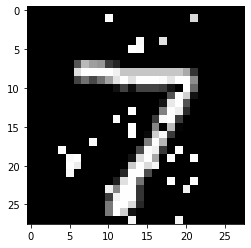

0.3222863
0.28147605
0.37195417
0.381017
0.23608597
0.28466842
0.2833577
0.33848423
0.43501824
0.33532962
0.4210123
0.22799772
迭代: 8
置信度： 0.22799772


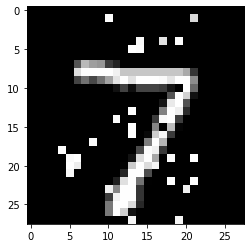

0.22799772
0.26978347
0.37062117
0.27295
0.32953227
0.42565903
0.25914845
0.43828076
0.26219693
0.40609065
0.44236523
0.3492957
0.29743943
0.40719545
0.27725357
0.35732082
0.261798
0.5339151
0.269526
0.4497661
0.5206776
0.43947586
0.37719244
0.2986337
0.5309876
0.372745
0.4368668
0.28252906
0.30886018
0.2760789
0.36415303
0.4691833
0.74110496
0.36396262
0.39772606
0.461681
0.30608344
0.34207824
0.2675156
0.35681954
0.5872181
0.31873822
0.37805277
0.26653078
0.43480048
0.48195136
0.2869161
0.34538174
0.38458905
0.34851816
0.23928201
0.5087322
0.34483728
0.3933777
0.5588609
0.3376413
0.3326753
0.61029273
0.49523476
0.4521792
0.24757144
0.22154985
迭代: 9
置信度： 0.22154985


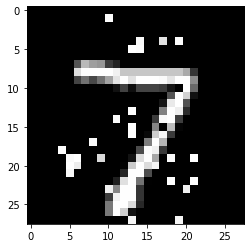

0.82156956
0.25734755
0.24362347
0.29905796
0.370821
0.25851858
0.45074767
0.38713443
0.22154985
0.22154985
0.54736197
0.27868107
0.26500127
0.45683247
0.33242044
0.40788192
0.71581084
0.36408597
0.3136089
0.43747535
0.22154985
0.4561201
0.315384
0.23824938
0.41516492
0.37153938
0.32212305
0.519349
0.4031762
0.33074558
0.40644246
0.29620755
0.3300802
0.22154985
0.2615428
0.31108102
0.35141575
0.37902477
0.36686003
0.32997873
0.24696976
0.31895265
0.3645967
0.21617743
迭代: 10
置信度： 0.21617743


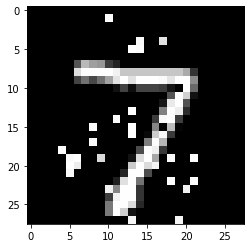

0.21598703
迭代: 11
置信度： 0.21598703


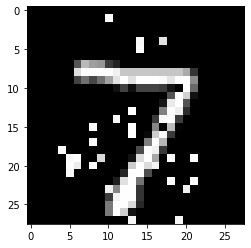

0.27207005
0.28738347
0.5049326
0.2718564
0.24814294
0.2764754
0.5106223
0.23825097
0.5446567
0.27790734
0.26894048
0.2961851
0.21582378
迭代: 12
置信度： 0.21582378


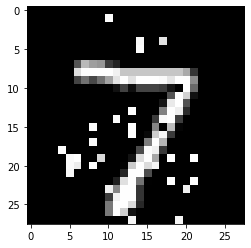

0.30959433
0.47203013
0.49187508
0.43097848
0.2406896
0.33436736
0.25477922
0.27635807
0.31621724
0.3616324
0.21582378
0.4415697
0.48205432
0.501142
0.55078465
0.3721529
0.3089936
0.29485247
0.2581546
0.4717928
0.21582378
0.33968335
0.20697857
迭代: 13
置信度： 0.20697857


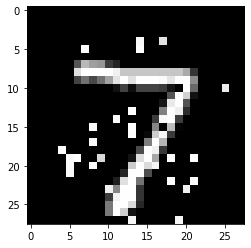

0.40230542
0.38514477
0.42170173
0.24976523
0.41497716
0.46278742
0.30526167
0.32492283
0.23766366
0.4143561
0.28090566
0.30558047
0.35170734
0.6708518
0.3171716
0.6952531
0.22387026
0.38027614
0.34587
0.34663224
0.23477751
0.49430966
0.2770964
0.20697857
0.31260124
0.31673303
0.43912387
0.37750795
0.60911965
0.4466732
0.331569
0.46064404
0.30938315
0.30227008
0.3506876
0.24502048
0.2856788
0.2562256
0.34788558
0.29935446
0.27834627
0.2229874
0.23764499
0.25181195
0.25686166
0.20697857
0.22473708
0.6399523
0.3145836
0.30090427
0.46759653
0.3915185
0.73404056
0.4096186
0.25250593
0.44327542
0.5448309
0.5565243
0.37653604
0.22849055
0.49275038
0.46826693
0.50451463
0.27459675
0.43151355
0.26149514
0.20697857
0.38350698
0.20697857
0.35339624
0.22144309
0.34083876
0.34873447
0.3275017
0.3338319
0.53214717
0.33872277
0.32723314
0.2686262
0.27757367
0.26615763
0.363902
0.25624138
0.3413986
0.40268368
0.55203956
0.2926706
0.36529392
0.3818702
0.3070948
0.22447908
0.6774588
0.36447915
0.341376

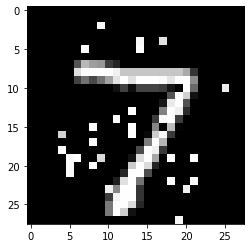

0.61381733
0.30140886
0.19861741
0.34465328
0.39726275
0.24172786
0.28084937
0.32965374
0.27803838
0.23751283
0.3591476
0.30061546
0.1977263
0.44402668
0.4453599
0.42534968
0.32902882
0.23840743
0.31948942
0.46809715
0.24511121
0.21038286
0.21772441
0.26466024
0.1977263
0.25107583
0.70570874
0.33534643
0.17757325
迭代: 15
置信度： 0.17757325


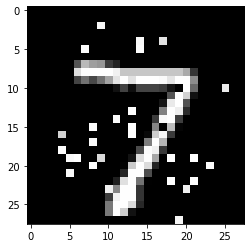

0.27358308
0.55048394
0.19085075
0.3020913
0.22935548
0.24788624
0.3048264
0.46286806
0.26579854
0.27803794
0.53522706
0.39861432
0.34769297
0.3670472
0.18362904
0.32471713
0.48590204
0.307119
0.29068866
0.21110691
0.47649208
0.23205593
0.47770122
0.25842115
0.24135073
0.19127092
0.28026393
0.44137475
0.216959
0.288426
0.30567464
0.27753165
0.24200346
0.5458033
0.26844862
0.2202571
0.28081897
0.5045555
0.17757325
0.36758244
0.35505083
0.214599
0.19541997
0.1983637
0.17771891
0.3998997
0.27564573
0.27426726
0.37779677
0.257819
0.44807753
0.31079596
0.37314516
0.14850071
迭代: 16
置信度： 0.14850071


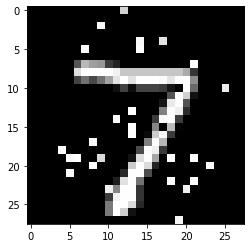

0.3769783
0.263079
0.35694566
0.3105306
0.23580949
0.43572527
0.25613526
0.3930715
0.37212607
0.4333516
0.48611543
0.31664628
0.17791227
0.46714875
0.19716182
0.38064194
0.21064071
0.23249172
0.38426423
0.5537626
0.3853337
0.24538492
0.4228331
0.15644088
0.14834824
迭代: 17
置信度： 0.14834824


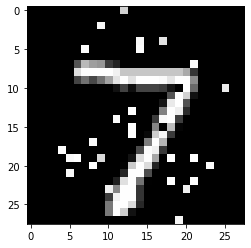

0.2829757
0.22157519
0.26996982
0.26253867
0.14819019
迭代: 18
置信度： 0.14819019


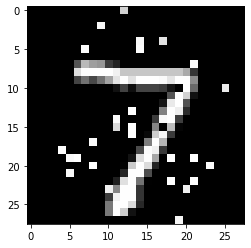

0.16110851
0.20272857
0.44318217
0.18359978
0.26270714
0.41429538
0.20540594
0.25725514
0.14819019
0.20366763
0.3863255
0.1757736
0.27965668
0.18654574
0.18765415
0.2551356
0.24761073
0.22449431
0.14819019
0.27975377
0.33769083
0.16685481
0.47729677
0.1775694
0.17202902
0.25565603
0.3211115
0.20716459
0.36040697
0.24106255
0.20666295
0.14819019
0.17741176
0.15400034
0.22063418
0.3681668
0.4928417
0.2251925
0.23188935
0.26874205
0.13841932
迭代: 19
置信度： 0.13841932


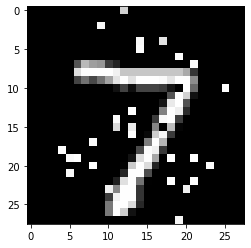

0.2797266
0.17850222
0.17795756
0.15841876
0.24844301
0.3291746
0.1692509
0.5244903
0.28229728
0.19002727
0.1571406
0.14177449
0.21217875
0.26316735
0.16690473
0.26805642
0.2576717
0.3220067
0.4901073
0.1506544
0.13841932
0.17659442
0.27678794
0.23531072
0.18565148
0.19145535
0.22001404
0.35460937
0.24966557
0.19015963
0.22993591
0.2982831
0.28762034
0.13841932
0.3709624
0.13438608
迭代: 20
置信度： 0.13438608


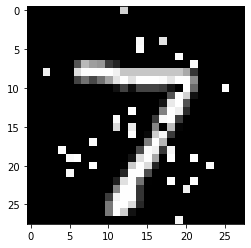

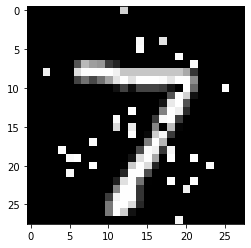

最终置信度： 0.13438608
[5.1539890e-03 7.4655650e-04 3.2068649e-01 5.1205546e-01 1.1018379e-04
 1.6623138e-02 4.4017837e-05 1.3438608e-01 8.8452464e-03 1.3489146e-03]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.82357685 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [18]:
# 改变坐标减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(20):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][y]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])
print(f)